In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 8
NUM_EPOCH = 10

train_path = "/content/gdrive/My Drive/app/xray/chest_xray/train"
valid_path = "/content/gdrive/My Drive/app/xray/chest_xray/val"

In [0]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(vgg.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')
valid_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
652/652 [==============================] - 2594s 4s/step - loss: 0.2108 - acc: 0.9312 - val_loss: 0.0717 - val_acc: 1.0000
Epoch 2/10
652/652 [==============================] - 176s 270ms/step - loss: 0.1364 - acc: 0.9536 - val_loss: 0.0936 - val_acc: 0.9375
Epoch 3/10
652/652 [==============================] - 158s 243ms/step - loss: 0.1301 - acc: 0.9599 - val_loss: 0.2948 - val_acc: 0.8750
Epoch 4/10
652/652 [==============================] - 172s 263ms/step - loss: 0.1601 - acc: 0.9530 - val_loss: 0.1863 - val_acc: 0.9375
Epoch 5/10
652/652 [==============================] - 174s 267ms/step - loss: 0.1645 - acc: 0.9636 - val_loss: 0.3618 - val_acc: 0.9375
Epoch 6/10
652/652 [==============================] - 165s 253ms/step - loss: 0.1326 - acc: 0.9672 - val_loss: 0.3169 - val_acc: 0.9375
Epoch 7/10
652/652 [==============================] - 180s 276ms/step - loss: 0.1536 - acc: 0.9615 - val_loss: 0.4302 - val_acc: 0.8750
Ep

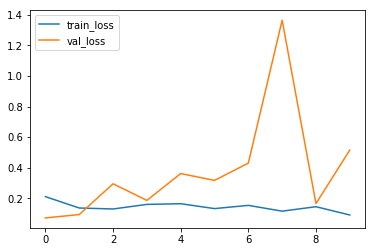

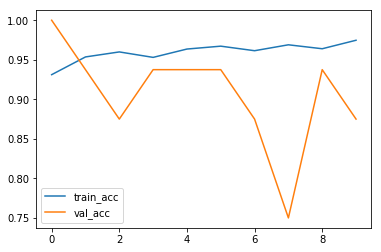

<Figure size 432x288 with 0 Axes>

In [0]:
r=model.fit_generator(training_set, validation_data=valid_set, epochs=NUM_EPOCH, steps_per_epoch=len(training_set), validation_steps=len(valid_set))

plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/vgg16/Lossval_loss")

plt.plot(r.history['acc'], label='train_acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/vgg16/Lossval_acc")

model.save("/content/gdrive/My Drive/app/xray/vgg16/model_vgg16.h5")

Binh Thuong
[[1. 0.]]
1.0
0.0


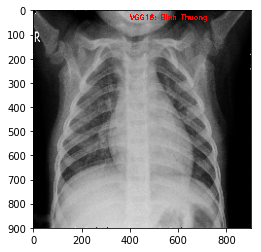

In [0]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

model = load_model('/content/gdrive/My Drive/app/xray/vgg16/model_vgg16.h5')
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg", target_size=(224, 224))
img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg", target_size=(224, 224))

#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1629_virus_2823.jpeg", target_size=(224, 224))
#model.summary()
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

numpy_image = np.uint8(img_to_array(img)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))
label = "Binh Thuong" if classes[0][0] == 1 else "Viem Phoi"
cv2.putText(numpy_image, "VGG16: {}".format(label) , (400, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

plt.imshow(numpy_image)
plt.savefig('/content/gdrive/My Drive/app/xray/vgg16/test1.png')
print(label)
print(classes)
print(classes[0][0])
print(classes[0][1])

Chạy predict với một ảnh bất kỳ. Kết quả [1. 0.] là nomal và [0. 1.] là bị viêm phổi Mình đã chạy thử với một vài ảnh và model của chúng ta vừa train đã dự đoán đúng gần hết. Thật tuyệt phải không nào!